# Capstone Project 1: MuscleHub AB Test

## Step 1: Get started with SQL

Like most businesses, Janet keeps her data in a SQL database.  Normally, you'd download the data from her database to a csv file, and then load it into a Jupyter Notebook using Pandas.

For this project, you'll have to access SQL in a slightly different way.  You'll be using a special Codecademy library that lets you type SQL queries directly into this Jupyter notebook.  You'll have pass each SQL query as an argument to a function called `sql_query`.  Each query will return a Pandas DataFrame.  Here's an example:

In [21]:
# This import only needs to happen once, at the beginning of the notebook
from codecademySQL import sql_query

In [22]:
# Here's an example of a query that just displays some data
sql_query('''
SELECT *
FROM visits
LIMIT 100
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17
...,...,...,...,...,...,...
95,95,John,Navarro,JN5941@gmail.com,male,5-13-17
96,96,Fernando,Calhoun,FCalhoun1984@hotmail.com,male,5-13-17
97,97,Christian,Potter,CPotter1994@outlook.com,male,5-14-17
98,98,Clara,Delgado,ClaraDelgado77@outlook.com,female,5-14-17


In [23]:
# Here's an example where we save the data to a DataFrame
df = sql_query('''
SELECT *
FROM applications
LIMIT 5
''')

## Step 2: Get your dataset

Let's get started!

Janet of MuscleHub has a SQLite database, which contains several tables that will be helpful to you in this investigation:
- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

Use the space below to examine each table.

In [24]:
# Examine visits here
visits = sql_query('''
SELECT *
FROM visits
''')
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       6000 non-null   int64 
 1   first_name  6000 non-null   object
 2   last_name   6000 non-null   object
 3   email       6000 non-null   object
 4   gender      6000 non-null   object
 5   visit_date  6000 non-null   object
dtypes: int64(1), object(5)
memory usage: 281.4+ KB
None


In [25]:
# Examine fitness_tests here
fitness_tests = sql_query('''
SELECT *
FROM fitness_tests
''')
print(fitness_tests.head())
print(len(fitness_tests))

   index first_name last_name                   email  gender  \
0      0        Kim    Walter   KimWalter58@gmail.com  female   
1      1        Tom   Webster        TW3857@gmail.com    male   
2      2     Marcus     Bauer  Marcus.Bauer@gmail.com    male   
3      3    Roberta      Best      RB6305@hotmail.com  female   
4      4     Carrie   Francis      CF1896@hotmail.com  female   

  fitness_test_date  
0        2017-07-03  
1        2017-07-02  
2        2017-07-01  
3        2017-07-02  
4        2017-07-05  
2500


In [26]:
# Examine applications here
applications = sql_query('''
SELECT *
FROM applications
''')
print(applications.head())

   index first_name last_name                    email  gender  \
0      0        Roy    Abbott    RoyAbbott32@gmail.com    male   
1      1      Agnes   Acevedo  AgnesAcevedo1@gmail.com  female   
2      2    Roberta   Acevedo         RA8063@gmail.com  female   
3      3     Darren    Acosta  DAcosta1996@hotmail.com    male   
4      4     Vernon    Acosta    VAcosta1975@gmail.com    male   

  application_date  
0       2017-08-12  
1       2017-09-29  
2       2017-09-15  
3       2017-07-26  
4       2017-07-14  


In [27]:
# Examine purchases here
purchases = sql_query('''
SELECT *
FROM purchases
''')
print(purchases.head())

   index first_name last_name                    email  gender purchase_date
0      0        Roy    Abbott    RoyAbbott32@gmail.com    male    2017-08-18
1      1    Roberta   Acevedo         RA8063@gmail.com  female    2017-09-16
2      2     Vernon    Acosta    VAcosta1975@gmail.com    male    2017-07-20
3      3     Darren    Acosta  DAcosta1996@hotmail.com    male    2017-07-27
4      4       Dawn    Adkins    Dawn.Adkins@gmail.com  female    2017-08-24


We'd like to download a giant DataFrame containing all of this data.  You'll need to write a query that does the following things:

1. Not all visits in  `visits` occurred during the A/B test.  You'll only want to pull data where `visit_date` is on or after `7-1-17`.

2. You'll want to perform a series of `LEFT JOIN` commands to combine the four tables that we care about.  You'll need to perform the joins on `first_name`, `last_name`, and `email`.  Pull the following columns:


- `visits.first_name`
- `visits.last_name`
- `visits.gender`
- `visits.email`
- `visits.visit_date`
- `fitness_tests.fitness_test_date`
- `applications.application_date`
- `purchases.purchase_date`

Save the result of this query to a variable called `df`.

Hint: your result should have 5004 rows.  Does it?

In [28]:
# Reduce the visits dataframe to the period when the A/B test was performed (7-1-17 or after)
visits = visits[visits.visit_date >= '7-1-17']
print(len(visits))

# Perform a series of left joins until all dfs are joined - and drop the columns we don't need along the way
merge_0 = visits.merge(fitness_tests,\
                       left_on=['first_name', 'last_name', 'email'],\
                       right_on=['first_name', 'last_name', 'email'],\
                       how='left'
                      ).drop(columns=['index_x', 'gender_y', 'index_y'])
merge_1 = merge_0.merge(applications,\
                        left_on=['first_name', 'last_name', 'email'],\
                        right_on=['first_name', 'last_name', 'email'],\
                        how='left'
                       ).drop(columns=['gender', 'index'])
df = merge_1.merge(purchases,\
                   left_on=['first_name', 'last_name', 'email'],\
                   right_on=['first_name', 'last_name', 'email'],\
                   how='left'
                  ).drop(columns=['gender', 'index'])
df = df.rename(columns={'gender_x':'gender'})
print(df.head())
print(len(df))

5000
  first_name last_name                   email  gender visit_date  \
0        Kim    Walter   KimWalter58@gmail.com  female     7-1-17   
1        Tom   Webster        TW3857@gmail.com    male     7-1-17   
2     Edward     Bowen  Edward.Bowen@gmail.com    male     7-1-17   
3     Marcus     Bauer  Marcus.Bauer@gmail.com    male     7-1-17   
4    Roberta      Best      RB6305@hotmail.com  female     7-1-17   

  fitness_test_date application_date purchase_date  
0        2017-07-03              NaN           NaN  
1        2017-07-02              NaN           NaN  
2               NaN       2017-07-04    2017-07-04  
3        2017-07-01       2017-07-03    2017-07-05  
4        2017-07-02              NaN           NaN  
5004


## Step 3: Investigate the A and B groups

We have some data to work with! Import the following modules so that we can start doing analysis:
- `import pandas as pd`
- `from matplotlib import pyplot as plt`

In [29]:
import pandas as pd
from matplotlib import pyplot as plt

We're going to add some columns to `df` to help us with our analysis.

Start by adding a column called `ab_test_group`.  It should be `A` if `fitness_test_date` is not `None`, and `B` if `fitness_test_date` is `None`.

In [30]:
ab_test_lambda = lambda x: 'A' if x==x else 'B'
df['ab_test_group'] = df['fitness_test_date'].apply(ab_test_lambda)
print(df.head())

  first_name last_name                   email  gender visit_date  \
0        Kim    Walter   KimWalter58@gmail.com  female     7-1-17   
1        Tom   Webster        TW3857@gmail.com    male     7-1-17   
2     Edward     Bowen  Edward.Bowen@gmail.com    male     7-1-17   
3     Marcus     Bauer  Marcus.Bauer@gmail.com    male     7-1-17   
4    Roberta      Best      RB6305@hotmail.com  female     7-1-17   

  fitness_test_date application_date purchase_date ab_test_group  
0        2017-07-03              NaN           NaN             A  
1        2017-07-02              NaN           NaN             A  
2               NaN       2017-07-04    2017-07-04             B  
3        2017-07-01       2017-07-03    2017-07-05             A  
4        2017-07-02              NaN           NaN             A  


Let's do a quick sanity check that Janet split her visitors such that about half are in A and half are in B.

Start by using `groupby` to count how many users are in each `ab_test_group`.  Save the results to `ab_counts`.

In [31]:
ab_counts = df.groupby(df.ab_test_group).last_name.count()
print(ab_counts)

ab_test_group
A    2504
B    2500
Name: last_name, dtype: int64


We'll want to include this information in our presentation.  Let's create a pie cart using `plt.pie`.  Make sure to include:
- Use `plt.axis('equal')` so that your pie chart looks nice
- Add a legend labeling `A` and `B`
- Use `autopct` to label the percentage of each group
- Save your figure as `ab_test_pie_chart.png`

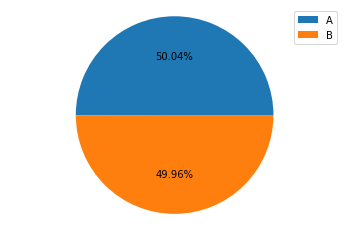

In [32]:
plt.pie(ab_counts, autopct='%.2f%%')
plt.axis('equal')
plt.legend(['A', 'B'])
plt.savefig('ab_test_pie_chart.png')
plt.show()

## Step 4: Who picks up an application?

Recall that the sign-up process for MuscleHub has several steps:
1. Take a fitness test with a personal trainer (only Group A)
2. Fill out an application for the gym
3. Send in their payment for their first month's membership

Let's examine how many people make it to Step 2, filling out an application.

Start by creating a new column in `df` called `is_application` which is `Application` if `application_date` is not `None` and `No Application`, otherwise.

In [33]:
application_lambda = lambda x: 'Application' if x==x else 'No Application'
df['is_application'] = df.application_date.apply(application_lambda)
print(df.head())

  first_name last_name                   email  gender visit_date  \
0        Kim    Walter   KimWalter58@gmail.com  female     7-1-17   
1        Tom   Webster        TW3857@gmail.com    male     7-1-17   
2     Edward     Bowen  Edward.Bowen@gmail.com    male     7-1-17   
3     Marcus     Bauer  Marcus.Bauer@gmail.com    male     7-1-17   
4    Roberta      Best      RB6305@hotmail.com  female     7-1-17   

  fitness_test_date application_date purchase_date ab_test_group  \
0        2017-07-03              NaN           NaN             A   
1        2017-07-02              NaN           NaN             A   
2               NaN       2017-07-04    2017-07-04             B   
3        2017-07-01       2017-07-03    2017-07-05             A   
4        2017-07-02              NaN           NaN             A   

   is_application  
0  No Application  
1  No Application  
2     Application  
3     Application  
4  No Application  


Now, using `groupby`, count how many people from Group A and Group B either do or don't pick up an application.  You'll want to group by `ab_test_group` and `is_application`.  Save this new DataFrame as `app_counts`

In [34]:
app_counts = df.groupby(['ab_test_group', 'is_application']).last_name.count().reset_index()
print(app_counts)

  ab_test_group  is_application  last_name
0             A     Application        250
1             A  No Application       2254
2             B     Application        325
3             B  No Application       2175


We're going to want to calculate the percent of people in each group who complete an application.  It's going to be much easier to do this if we pivot `app_counts` such that:
- The `index` is `ab_test_group`
- The `columns` are `is_application`
Perform this pivot and save it to the variable `app_pivot`.  Remember to call `reset_index()` at the end of the pivot!

In [46]:
app_counts_pivot = app_counts.pivot(index='ab_test_group', columns='is_application', values='last_name')
print(app_counts_pivot)

is_application  Application  No Application
ab_test_group                              
A                       250            2254
B                       325            2175


Define a new column called `Total`, which is the sum of `Application` and `No Application`.

In [47]:
app_counts_pivot['Total'] = app_counts_pivot['Application'] + app_counts_pivot['No Application']
print(app_counts_pivot)

is_application  Application  No Application  Total
ab_test_group                                     
A                       250            2254   2504
B                       325            2175   2500


Calculate another column called `Percent with Application`, which is equal to `Application` divided by `Total`.

In [48]:
app_counts_pivot['Percent with Application'] = app_counts_pivot['Application'] / app_counts_pivot['Total']
print(app_counts_pivot)

is_application  Application  No Application  Total  Percent with Application
ab_test_group                                                               
A                       250            2254   2504                   0.09984
B                       325            2175   2500                   0.13000


It looks like more people from Group B turned in an application.  Why might that be?

We need to know if this difference is statistically significant.

Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

In [52]:
# We have one population from which we have two categorical variables - (1) test group and (2) whether they made an 
# application. The purpose of our test is to see whether there is a significant relationship/association between 
# the two variables. Put another way, we ask, does the group to which the users belong impact on whether they make an
# application? 
# For this test, we choose the Chi Squared Test of Independence
# Null hypothesis: independent - i.e. no impact / no difference
# Alternative hypothesis: not independent - i.e. group B turned in significantly more applications
# Assume significance value = 0.05
app_counts_pivot_contingency = app_counts_pivot.drop(columns=['Total', 'Percent with Application'])
print(app_counts_pivot_contingency)

from scipy.stats import chi2_contingency
_, p_value, _, _ = chi2_contingency(app_counts_pivot_contingency)
print(p_value)

# The p-value is 0.00096, which is far smaller than 0.05. We therefore reject the null hypothesis and 
# accept the alternative hypothesis. We conclude that there is a statistically significant difference between the
# rate of application between the A group and the B group in that the B group was more likely to turn in an application.

is_application  Application  No Application
ab_test_group                              
A                       250            2254
B                       325            2175
0.0009647827600722304


## Step 4: Who purchases a membership?

Of those who picked up an application, how many purchased a membership?

Let's begin by adding a column to `df` called `is_member` which is `Member` if `purchase_date` is not `None`, and `Not Member` otherwise.

In [56]:
member_lambda = lambda x: 'Member' if x==x else 'Not Member'
df['is_member'] = df.purchase_date.apply(member_lambda)
print(df.head())

  first_name last_name                   email  gender visit_date  \
0        Kim    Walter   KimWalter58@gmail.com  female     7-1-17   
1        Tom   Webster        TW3857@gmail.com    male     7-1-17   
2     Edward     Bowen  Edward.Bowen@gmail.com    male     7-1-17   
3     Marcus     Bauer  Marcus.Bauer@gmail.com    male     7-1-17   
4    Roberta      Best      RB6305@hotmail.com  female     7-1-17   

  fitness_test_date application_date purchase_date ab_test_group  \
0        2017-07-03              NaN           NaN             A   
1        2017-07-02              NaN           NaN             A   
2               NaN       2017-07-04    2017-07-04             B   
3        2017-07-01       2017-07-03    2017-07-05             A   
4        2017-07-02              NaN           NaN             A   

   is_application   is_member  
0  No Application  Not Member  
1  No Application  Not Member  
2     Application      Member  
3     Application      Member  
4  No Applicatio

Now, let's create a DataFrame called `just_apps` the contains only people who picked up an application.

In [57]:
just_apps = df[df.is_application == 'Application']
print(just_apps.head())

   first_name last_name                    email  gender visit_date  \
2      Edward     Bowen   Edward.Bowen@gmail.com    male     7-1-17   
3      Marcus     Bauer   Marcus.Bauer@gmail.com    male     7-1-17   
9    Salvador  Cardenas  SCardenas1980@gmail.com    male     7-1-17   
11    Valerie     Munoz     VMunoz1998@gmail.com  female     7-1-17   
35    Michael     Burks         MB9820@gmail.com    male     7-1-17   

   fitness_test_date application_date purchase_date ab_test_group  \
2                NaN       2017-07-04    2017-07-04             B   
3         2017-07-01       2017-07-03    2017-07-05             A   
9         2017-07-07       2017-07-06           NaN             A   
11        2017-07-03       2017-07-05    2017-07-06             A   
35               NaN       2017-07-07    2017-07-13             B   

   is_application   is_member  
2     Application      Member  
3     Application      Member  
9     Application  Not Member  
11    Application      Member 

Great! Now, let's do a `groupby` to find out how many people in `just_apps` are and aren't members from each group.  Follow the same process that we did in Step 4, including pivoting the data.  You should end up with a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `member_pivot`.

In [58]:
member = just_apps.groupby(['ab_test_group', 'is_member']).last_name.count().reset_index()
member_pivot = member.pivot(index='ab_test_group', columns='is_member', values='last_name')
member_pivot['Total'] = member_pivot['Member'] + member_pivot['Not Member']
member_pivot['Percent Purchase'] = member_pivot['Member'] / member_pivot['Total']
print(member_pivot)

is_member      Member  Not Member  Total  Percent Purchase
ab_test_group                                             
A                 200          50    250          0.800000
B                 250          75    325          0.769231


It looks like people who took the fitness test were more likely to purchase a membership **if** they picked up an application.  Why might that be?

Just like before, we need to know if this difference is statistically significant.  Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

In [59]:
member_pivot_contingency = member_pivot.drop(columns=['Total', 'Percent Purchase'])
_, p_value2, _, _ = chi2_contingency(member_pivot_contingency)
print(p_value2)

# With a p-value of 0.433, which is greater that our significance value of 0.05, we fail to reject the null hypothesis. 
# We do not consider that the people in group A who made an application are statistically more or less likely to 
# purchase a membership that the people in group B who made an application. 

0.43258646051083327


Previously, we looked at what percent of people **who picked up applications** purchased memberships.  What we really care about is what percentage of **all visitors** purchased memberships.  Return to `df` and do a `groupby` to find out how many people in `df` are and aren't members from each group.  Follow the same process that we did in Step 4, including pivoting the data.  You should end up with a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `final_member_pivot`.

In [60]:
final_member = df.groupby(['ab_test_group', 'is_member']).last_name.count().reset_index()
final_member_pivot = final_member.pivot(index='ab_test_group', columns='is_member', values='last_name')
final_member_pivot['Total'] = final_member_pivot['Member'] + final_member_pivot['Not Member']
final_member_pivot['Percent Purchase'] = final_member_pivot['Member'] / final_member_pivot['Total']
print(final_member_pivot)


is_member      Member  Not Member  Total  Percent Purchase
ab_test_group                                             
A                 200        2304   2504          0.079872
B                 250        2250   2500          0.100000


Previously, when we only considered people who had **already picked up an application**, we saw that there was no significant difference in membership between Group A and Group B.

Now, when we consider all people who **visit MuscleHub**, we see that there might be a significant different in memberships between Group A and Group B.  Perform a significance test and check.

In [62]:
final_member_pivot_contingency = final_member_pivot.drop(columns=['Total', 'Percent Purchase'])

_, p_value3, _, _ = chi2_contingency(final_member_pivot_contingency)
print(p_value3)

# With a p-value of 0.015, which is less than our significance value of 0.05, we reject the null hypothesis. 
# We conclude that there is a significant difference in membership uptake between groups A and B.

0.014724114645783203


## Step 5: Summarize the acquisition funel with a chart

We'd like to make a bar chart for Janet that shows the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:
- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

Create one plot for **each** of the three sets of percentages that you calculated in `app_pivot`, `member_pivot` and `final_member_pivot`.  Each plot should:
- Label the two bars as `Fitness Test` and `No Fitness Test`
- Make sure that the y-axis ticks are expressed as percents (i.e., `5%`)
- Have a title

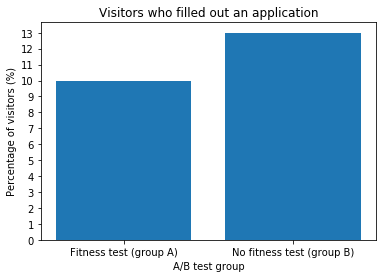

In [63]:
from matplotlib import pyplot as plt
# Group A = fitness test
# Group B = no fitness test

x_values = [0, 1]
ax = plt.subplot()
plt.bar(x_values, app_counts_pivot['Percent with Application']*100.0)
ax.set_xticks(x_values)
ax.set_xticklabels(['Fitness test (group A)', 'No fitness test (group B)'])
ax.set_yticks(range(0, 14))
plt.title('Visitors who filled out an application')
plt.xlabel('A/B test group')
plt.ylabel('Percentage of visitors (%)')
plt.savefig('visitors_who_apply.png')

plt.show()

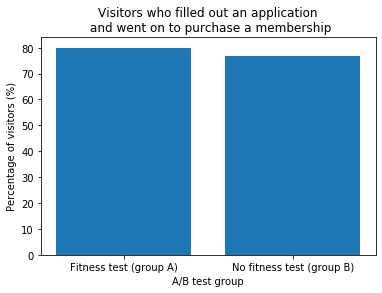

In [64]:
x_values = [0, 1]
ax2 = plt.subplot()
plt.bar(x_values, member_pivot['Percent Purchase']*100.0)
ax2.set_xticks(x_values)
ax2.set_xticklabels(['Fitness test (group A)', 'No fitness test (group B)'])
ax2.set_yticks(range(0, 81, 10))
plt.title('Visitors who filled out an application\n and went on to purchase a membership')
plt.xlabel('A/B test group')
plt.ylabel('Percentage of visitors (%)')
plt.savefig('visitors_who_apply_and_buy.png')

plt.show()

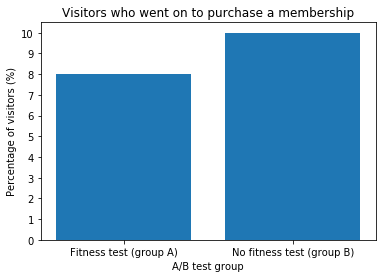

In [65]:
x_values = [0, 1]
ax3 = plt.subplot()
plt.bar(x_values, final_member_pivot['Percent Purchase']*100.0)
ax3.set_xticks(x_values)
ax3.set_xticklabels(['Fitness test (group A)', 'No fitness test (group B)'])
ax3.set_yticks(range(0, 11))
plt.title('Visitors who went on to purchase a membership')
plt.xlabel('A/B test group')
plt.ylabel('Percentage of visitors (%)')
plt.savefig('visitors_who_buy.png')

plt.show()